In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('ipo_data.csv')

# Feature selection and preprocessing
features = ['Company_Age', 'Revenue', 'Profit_Margin', 'Sector', 'IPO_Price', 'Opening_Price']
target = 'IPO_Return'

X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


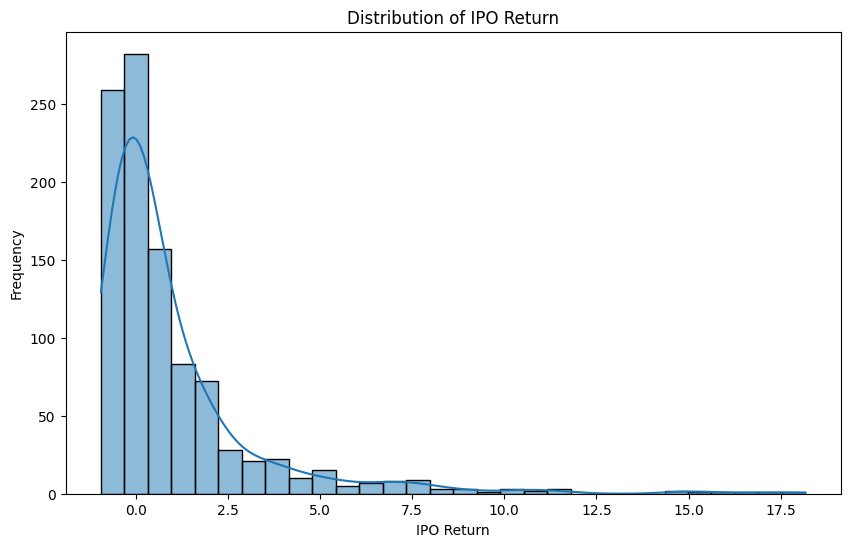

In [15]:
# EDA: Distribution of IPO Return
plt.figure(figsize=(10, 6))
sns.histplot(df['IPO_Return'], bins=30, kde=True)
plt.title('Distribution of IPO Return')
plt.xlabel('IPO Return')
plt.ylabel('Frequency')
plt.show()

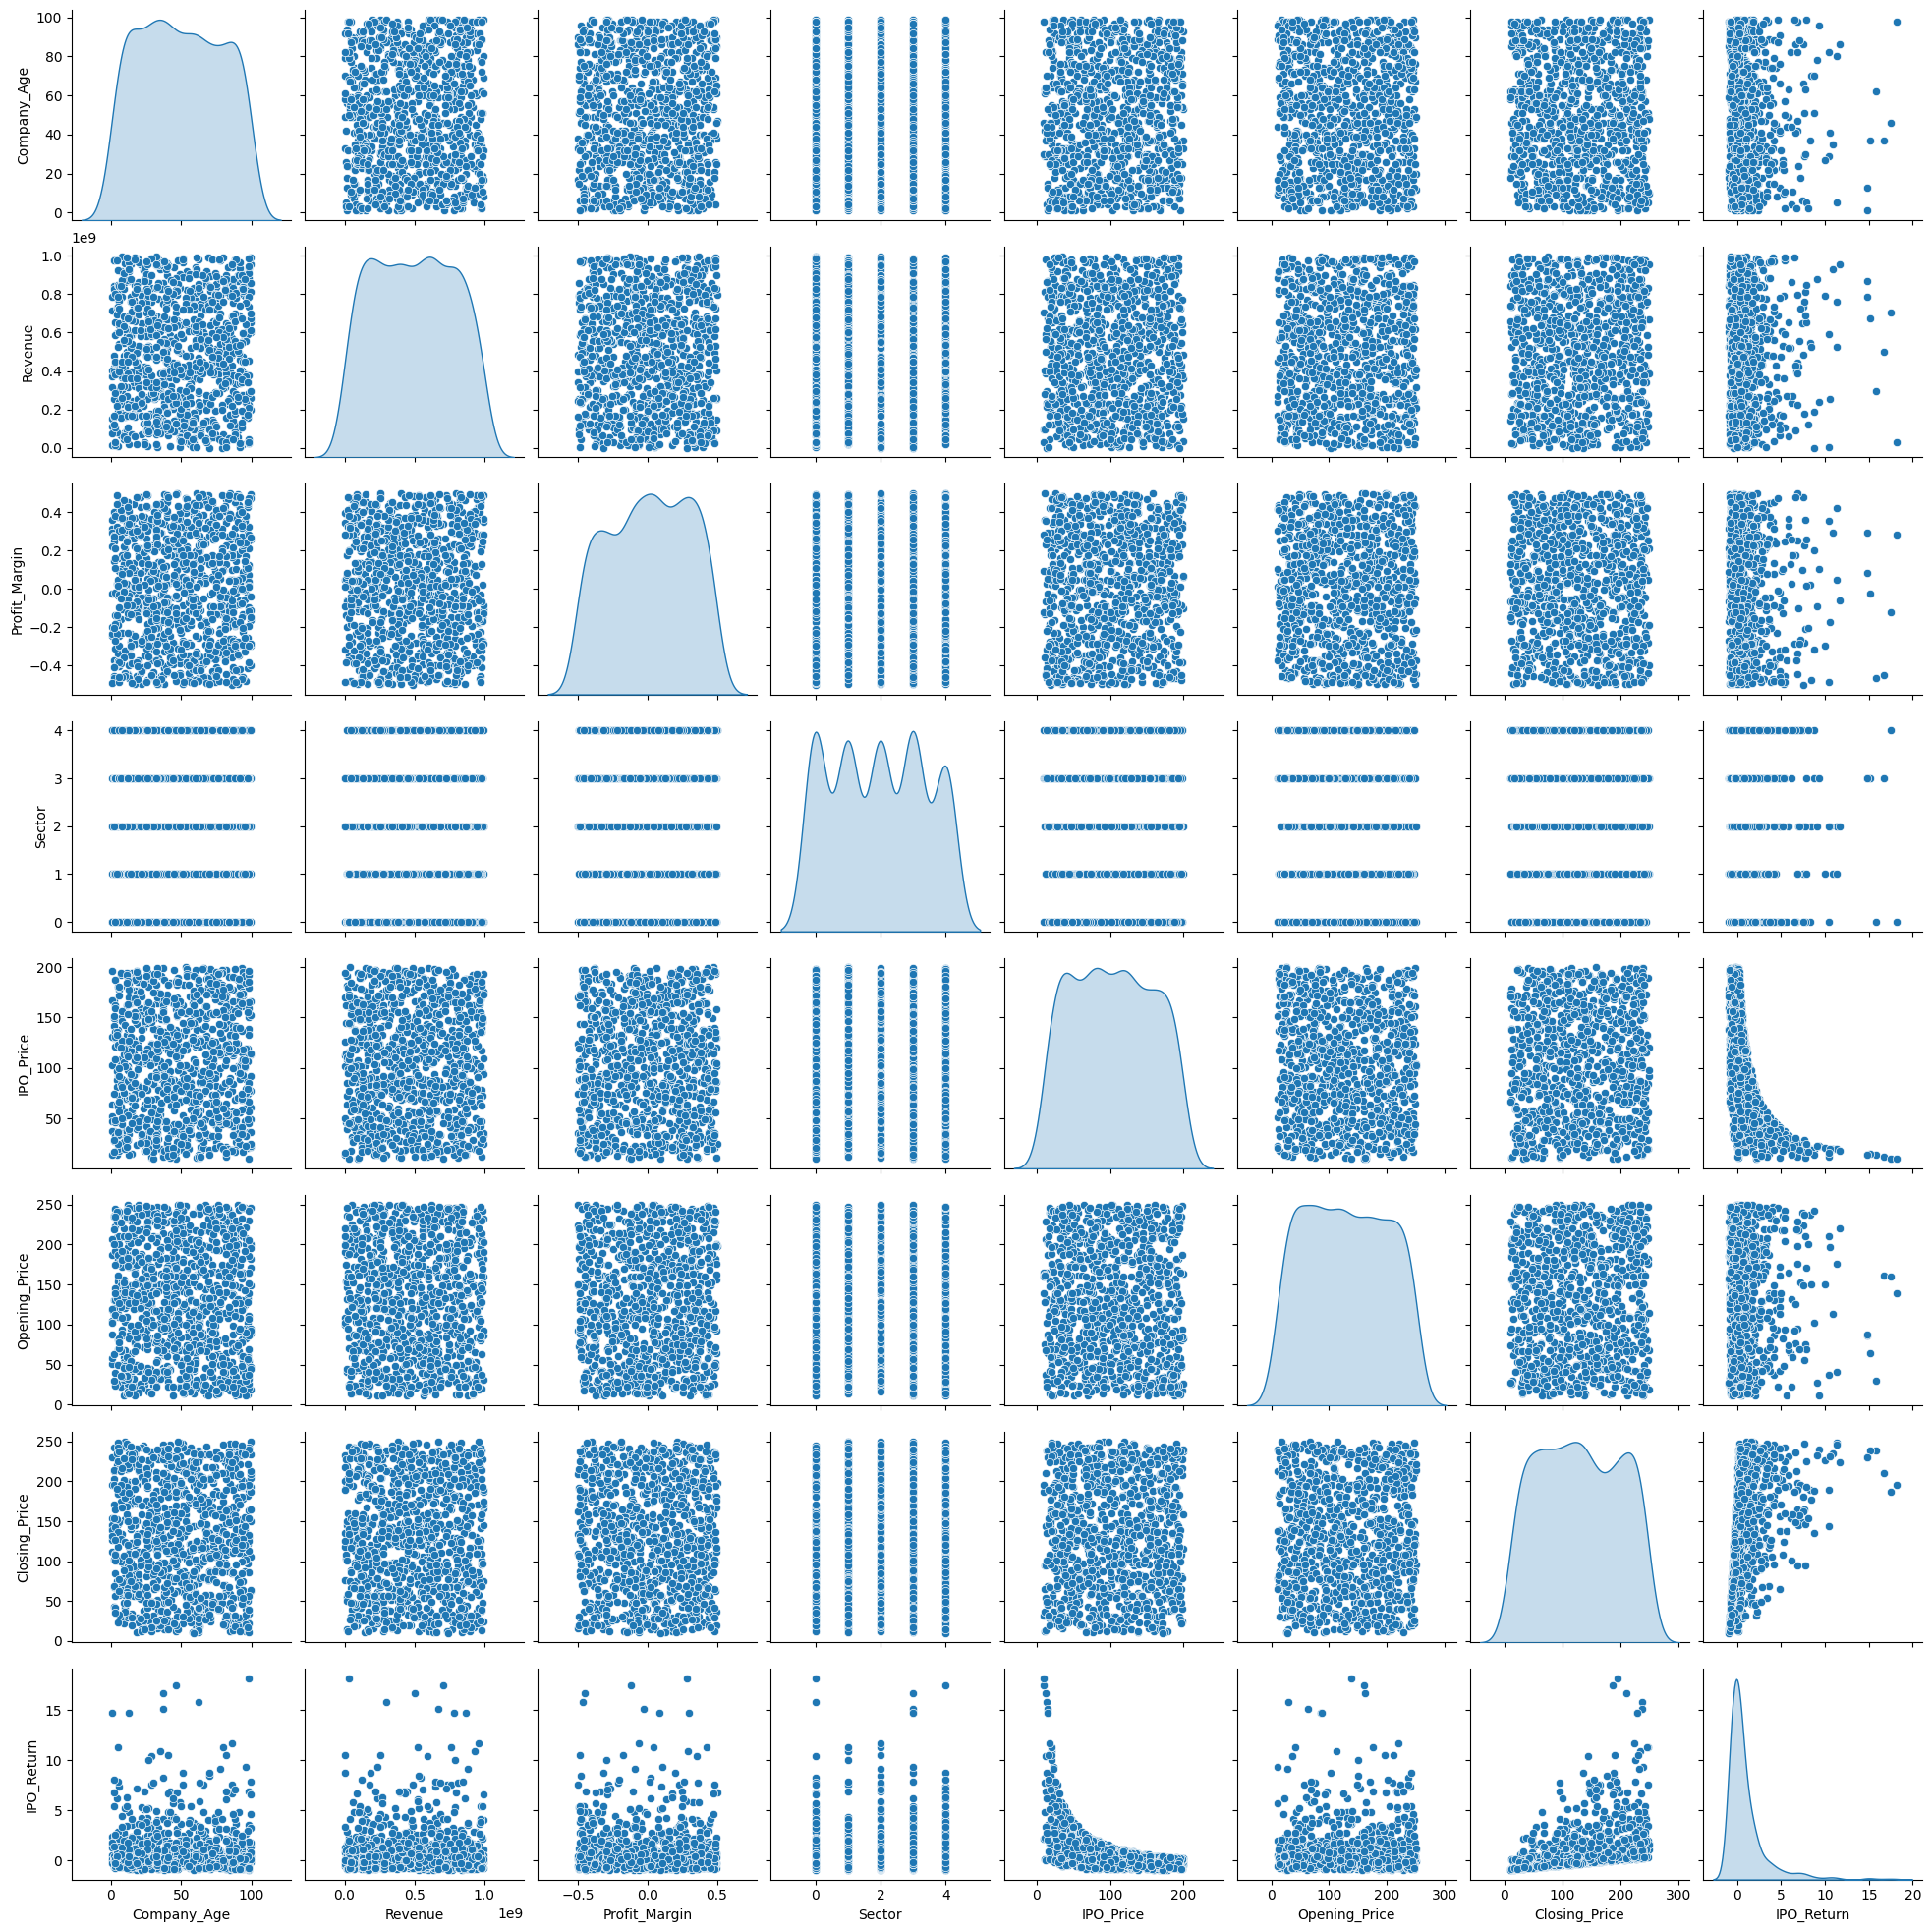

In [16]:
# EDA: Pairplot of numerical features
sns.pairplot(df, diag_kind='kde')
plt.show()


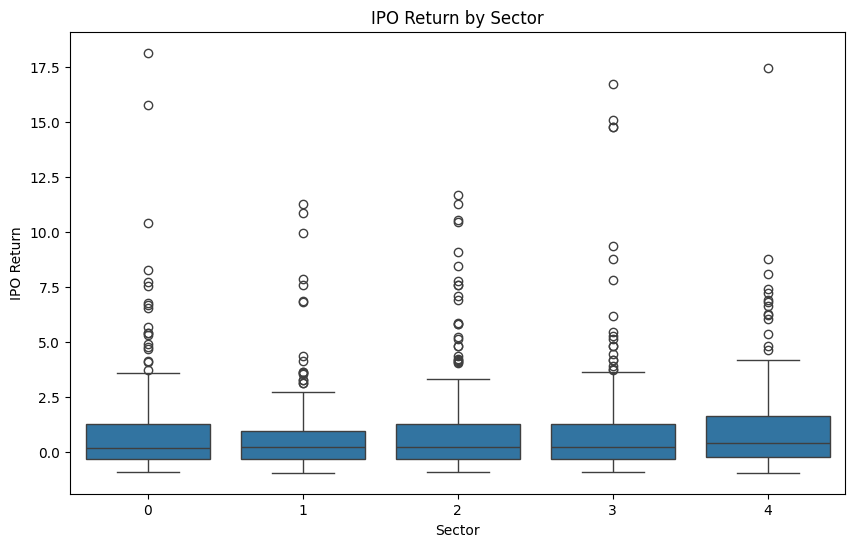

In [18]:
# EDA: Boxplot of IPO Return by Sector
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='IPO_Return', data=df)
plt.title('IPO Return by Sector')
plt.xlabel('Sector')
plt.ylabel('IPO Return')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
nn_history = nn_model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9152 - mae: 1.1777 - val_loss: 5.4411 - val_mae: 1.2625
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3773 - mae: 1.2353 - val_loss: 4.4670 - val_mae: 1.1285
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4103 - mae: 1.0736 - val_loss: 3.9905 - val_mae: 1.0907
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5947 - mae: 1.0645 - val_loss: 3.8207 - val_mae: 1.0906
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0944 - mae: 1.0533 - val_loss: 3.7463 - val_mae: 1.0858
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7115 - mae: 1.1740 - val_loss: 3.6657 - val_mae: 1.0548
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4663 - mae: 1.0466 - val_loss: 3.6366 - val_mae: 1.0420
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0587 - mae: 1.0064 - val_loss: 3.5870 - val_mae: 1.0405
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4570 - mae: 1.0648 - va

In [13]:
from tensorflow.keras.layers import Conv1D, Flatten

def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, 2, activation='relu', input_shape=(input_shape, 1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

cnn_model = create_cnn_model(X_train_scaled.shape[1])
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.1776 - mae: 1.3506 - val_loss: 4.6780 - val_mae: 1.1591
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6276 - mae: 1.2010 - val_loss: 3.8483 - val_mae: 1.1193
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0692 - mae: 1.0492 - val_loss: 3.6339 - val_mae: 1.0756
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8354 - mae: 1.0392 - val_loss: 3.5327 - val_mae: 1.0628
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6907 - mae: 1.0287 - val_loss: 3.4420 - val_mae: 1.0505
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0349 - mae: 1.0141 - val_loss: 3.3977 - val_mae: 1.0231
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3030 - mae: 1.0397 - val_loss: 3.3596 - val_mae: 1.0214
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9521 - mae: 1.0970 - val_loss: 3.3722 - val_mae: 1.0167
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6661 - mae: 0.9922 - v

In [14]:
from tensorflow.keras.layers import LSTM

def create_rnn_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(input_shape, 1)),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

rnn_model = create_rnn_model(X_train_scaled.shape[1])
X_train_rnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_rnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, validation_data=(X_test_rnn, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.0249 - mae: 1.2925 - val_loss: 5.7799 - val_mae: 1.2982
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7718 - mae: 1.4689 - val_loss: 5.2803 - val_mae: 1.3228
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5148 - mae: 1.3490 - val_loss: 5.0863 - val_mae: 1.3383
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1861 - mae: 1.3671 - val_loss: 4.8704 - val_mae: 1.3101
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7711 - mae: 1.3288 - val_loss: 4.6372 - val_mae: 1.2705
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2751 - mae: 1.3301 - val_loss: 4.3576 - val_mae: 1.2137
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6830 - mae: 1.3062 - val_loss: 3.7514 - val_mae: 1.0984
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5418 - mae: 1.1095 - val_loss: 3.4352 - val_mae: 1.0548
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5144 - mae: 1.1355 - v